In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Ace Advisory/ingredient.csv')

In [175]:
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


# Data Exploration

In [176]:
descriptive_stats = df[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']].describe()
print(descriptive_stats)

                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

In [177]:
missing_values = df.isnull().any()
missing_columns = missing_values[missing_values].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(column)

Columns with missing values:


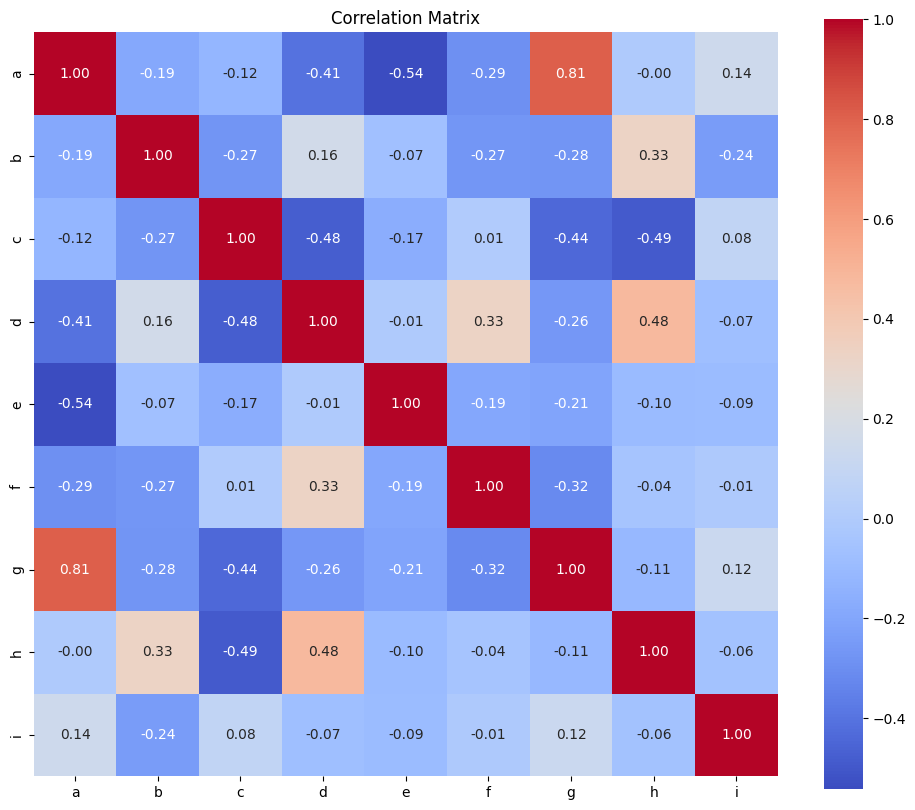

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns A to I

# Select the columns for correlation analysis
columns_for_correlation = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']  # Replace with the actual column names

# Create a new DataFrame with only the selected columns
data_for_correlation = df[columns_for_correlation]

# Perform correlation analysis
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Increase the figsize
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Add title and display the plot
plt.title("Correlation Matrix")
plt.show()

In [179]:
import statsmodels.api as sm


# Assuming you have your DataFrame stored in a variable called 'df'
columns_to_check = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
subset_df = df[columns_to_check]

# Add a constant column for the intercept in the VIF calculation
subset_df = sm.add_constant(subset_df)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = subset_df.columns
vif["VIF"] = [sm.OLS(subset_df[col], subset_df.drop(col, axis=1)).fit().rsquared for col in subset_df.columns]

print(vif)

  Variable       VIF
0    const  1.000000
1        a  0.894788
2        b  0.983816
3        c  0.995189
4        d  0.961063
5        e  0.982811
6        f  0.977075
7        g  0.995270
8        h  0.961738
9        i  0.179008


In [180]:
#from scipy.stats import zscore

# Step 1: Data Preparation
# Assuming you have a DataFrame named 'df' with columns representing variations and additives

# Step 2: Standardization
#additives = df
#additives_std = additives.apply(zscore)

#pca = PCA()
#additives_pca = pca.fit_transform(additives_std)

In [ ]:
#additives_std

#  PCA

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Step 2: Standardization
additives = df
scaler = MinMaxScaler()
additives_std = scaler.fit_transform(additives)


pca = PCA()
additives_pca = pca.fit_transform(additives_std)


In [40]:
additives_pca

array([[-0.18478222, -0.06713815,  0.07099425, ..., -0.07581091,
        -0.01322053, -0.00998742],
       [ 0.82254736,  0.73009536,  0.40374036, ...,  0.03584483,
         0.0580406 ,  0.00441128],
       [-0.22560457,  0.22594417, -0.19833409, ...,  0.00933912,
        -0.02173728, -0.00849109],
       ...,
       [-0.24097055, -0.06033277, -0.10394438, ...,  0.02238841,
        -0.00163738, -0.00754858],
       [-0.28748845,  0.19446059,  0.23838493, ...,  0.04266485,
         0.03627289,  0.00289568],
       [ 0.59722396, -0.3858702 ,  0.29988969, ...,  0.42432307,
        -0.01024153, -0.00829793]])

In [41]:
# Determine the number of principal components to retain based on explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [42]:
explained_variance_ratio

array([4.54295689e-01, 1.79900973e-01, 1.26494594e-01, 9.79784747e-02,
       6.86239844e-02, 4.21410072e-02, 2.60979021e-02, 4.32796192e-03,
       1.39413736e-04])

In [43]:
cumulative_explained_variance

array([0.45429569, 0.63419666, 0.76069126, 0.85866973, 0.92729371,
       0.96943472, 0.99553262, 0.99986059, 1.        ])

In [62]:
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1  # Adjust threshold as needed

In [63]:
n_components

5

In [64]:
# Transform data using selected principal components
additives_pca_subset = additives_pca[:, :n_components]

# Clustering

In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Step 3: Clustering with Optimal Number of Clusters
silhouette_scores = []
max_clusters = 10  # Maximum number of clusters to consider

for n_clusters in range(2, max_clusters+1):
    # Perform hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(additives_pca_subset)
    silhouette_avg = silhouette_score(additives_pca_subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2

# Step 4: Clustering with Optimal Number of Clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters)
cluster_labels = hierarchical.fit_predict(additives_pca_subset)

In [66]:
silhouette_scores

[0.5351963963409,
 0.5402687777744077,
 0.32436090300007836,
 0.3377954082119441,
 0.3781520099810061,
 0.38244129805063426,
 0.39340249323571586,
 0.40138020685663867,
 0.3989456039236558]

In [67]:
optimal_n_clusters

3

In [68]:
# Step 4: Subset Selection
# Create separate DataFrames for each cluster/group
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

In [8]:
cluster0 = df_clustered.loc[df_clustered['Cluster']==0]
cluster1 = df_clustered.loc[df_clustered['Cluster']==1]
cluster2 = df_clustered.loc[df_clustered['Cluster']==2]



In [70]:
cluster0.describe()

,a,b,c,d,e,f,g,h,i,Cluster
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0
mean,1.518195,13.246235,3.431173,1.305494,72.625309,0.480802,8.700000,0.015247,0.061605,0.0
std,0.002210,0.534369,0.463439,0.308700,0.542848,0.216915,0.734871,0.085431,0.095436,0.0
min,1.512150,11.030000,1.350000,0.290000,70.570000,0.000000,7.080000,0.000000,0.000000,0.0
25%,1.516655,12.872500,3.430000,1.172500,72.322500,0.402500,8.210000,0.000000,0.000000,0.0
50%,1.517690,13.210000,3.540000,1.310000,72.750000,0.570000,8.550000,0.000000,0.000000,0.0
75%,1.518965,13.530000,3.650000,1.520000,73.000000,0.610000,8.982500,0.000000,0.117500,0.0
max,1.527250,14.860000,4.490000,2.120000,73.810000,1.100000,11.640000,0.760000,0.370000,0.0


In [71]:
cluster1.describe()

,a,b,c,d,e,f,g,h,i,Cluster
count,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,1.516329,14.56000,0.480968,2.219032,72.786452,0.652581,8.187742,1.019355,0.012581,1.0
std,0.002658,0.77783,1.034332,0.591159,1.261606,1.577741,1.143048,0.725998,0.028979,0.0
min,1.511150,13.00000,0.000000,0.340000,69.890000,0.000000,5.430000,0.000000,0.000000,1.0
25%,1.515225,14.21500,0.000000,1.960000,72.830000,0.000000,7.935000,0.550000,0.000000,1.0
50%,1.516230,14.40000,0.000000,2.220000,73.110000,0.000000,8.530000,0.810000,0.000000,1.0
75%,1.517150,14.89000,0.000000,2.600000,73.375000,0.225000,8.890000,1.590000,0.000000,1.0
max,1.523650,17.38000,3.260000,3.500000,75.410000,6.210000,9.760000,2.880000,0.090000,1.0


In [72]:
cluster2.describe()

,a,b,c,d,e,f,g,h,i,Cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,1.522690,12.953810,0.177619,1.377619,72.648571,0.392857,12.074762,0.161429,0.087143,2.0
std,0.004692,1.187466,0.428193,0.521861,1.263207,0.605245,1.898512,0.686763,0.149504,0.0
min,1.516530,10.730000,0.000000,0.560000,69.810000,0.000000,8.930000,0.000000,0.000000,2.0
25%,1.519690,12.300000,0.000000,1.000000,72.190000,0.000000,10.990000,0.000000,0.000000,2.0
50%,1.521190,12.970000,0.000000,1.400000,72.670000,0.190000,11.520000,0.000000,0.000000,2.0
75%,1.526140,13.720000,0.000000,1.760000,73.390000,0.470000,13.300000,0.000000,0.100000,2.0
max,1.533930,14.990000,1.610000,2.170000,75.180000,2.700000,16.190000,3.150000,0.510000,2.0


# ANOVA Test for Addictive





In [73]:
from scipy.stats import f_oneway
# Perform ANOVA test
f_statistic, p_value = f_oneway(cluster0, cluster1, cluster2)

# Print the results
print("ANOVA results:")
print(f"  F-statistic: {f_statistic}")
print(f"  p-value: {p_value}")

ANOVA results:
  F-statistic: [ 38.56962264  56.80503592 559.1589841   73.61271715   0.56092826
   1.2020141  124.09782699 104.77795746   4.55397649          inf]
  p-value: [5.29351715e-15 1.83277439e-20 4.66608571e-85 5.60140464e-25
 5.71527693e-01 3.02637942e-01 2.34981892e-36 2.50261408e-32
 1.15805453e-02 0.00000000e+00]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [74]:
p_value = p_value[:-1] # remove cluster P value


# Create a DataFrame to store the p-values
df_p_values = pd.DataFrame({'P-value': p_value}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])

# Beautify the p-values in the DataFrame
df_p_values['P-value'] = df_p_values['P-value'].apply(lambda x: '{:.30f}'.format(x))

# Print the beautified DataFrame
print(df_p_values)

                            P-value
a  0.000000000000005293517148076943
b  0.000000000000000000018327743852
c  0.000000000000000000000000000000
d  0.000000000000000000000000560140
e  0.571527692725078417801398700249
f  0.302637941565799872822850602461
g  0.000000000000000000000000000000
h  0.000000000000000000000000000000
i  0.011580545262196375103092016445


In [245]:
df_clustered.to_csv('/content/drive/MyDrive/Capstone Project/Ace Advisory/ingredient_clustered.csv',index = False)

# ANOVA Test for Major Component of Formula

In [ ]:
pca_comp = pd.DataFrame(additives_pca)
pca_comp_filter = pca_comp[[0,1,2,3,4]]
pca_comp_filter['Cluster'] = cluster_labels

In [90]:
cluster0_ = pca_comp_filter.loc[pca_comp_filter['Cluster']==0]
cluster1_ = pca_comp_filter.loc[pca_comp_filter['Cluster']==1]
cluster2_ = pca_comp_filter.loc[pca_comp_filter['Cluster']==2]

In [91]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(cluster0_, cluster1_, cluster2_)

# Print the results
print("ANOVA results:")
print(f"  F-statistic: {f_statistic}")
print(f"  p-value: {p_value}")

ANOVA results:
  F-statistic: [621.8000526   79.81789329   4.55131329   9.55260913   7.29269765
          inf]
  p-value: [3.48616300e-89 1.54118082e-26 1.16101485e-02 1.06796422e-04
 8.65945787e-04 0.00000000e+00]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [26]:
# Calculate the mean for each column within each cluster
means_by_cluster = df_clustered.groupby('Cluster')[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']].mean()

means_df = pd.DataFrame()



In [27]:
means_by_cluster

,a,b,c,d,e,f,g,h,i
Cluster,,,,,,,,,
0,1.518195,13.246235,3.431173,1.305494,72.625309,0.480802,8.700000,0.015247,0.061605
1,1.516329,14.560000,0.480968,2.219032,72.786452,0.652581,8.187742,1.019355,0.012581
2,1.522690,12.953810,0.177619,1.377619,72.648571,0.392857,12.074762,0.161429,0.087143


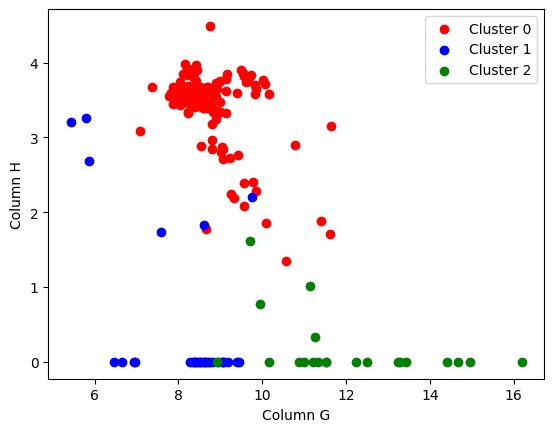

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns G, H, and 'Cluster' representing the cluster labels

# Plot columns G and H for each cluster
plt.scatter(cluster0['g'], cluster0['c'], c='red', label='Cluster 0')
plt.scatter(cluster1['g'], cluster1['c'], c='blue', label='Cluster 1')
plt.scatter(cluster2['g'], cluster2['c'], c='green', label='Cluster 2')

# Add labels and legend
plt.xlabel('Column G')
plt.ylabel('Column H')
plt.legend()

# Show the plot
plt.show()

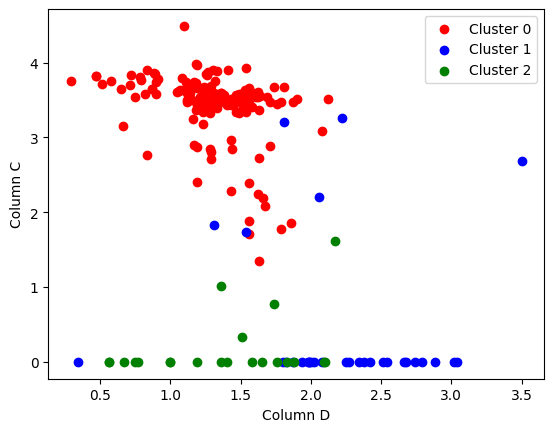

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns G, H, and 'Cluster' representing the cluster labels

# Plot columns G and H for each cluster
plt.scatter(cluster0['d'], cluster0['c'], c='red', label='Cluster 0')
plt.scatter(cluster1['d'], cluster1['c'], c='blue', label='Cluster 1')
plt.scatter(cluster2['d'], cluster2['c'], c='green', label='Cluster 2')

# Add labels and legend
plt.xlabel('Column D')
plt.ylabel('Column C')
plt.legend()

# Show the plot
plt.show()

In [6]:
df_clustered = pd.read_csv('/content/drive/MyDrive/Capstone Project/Ace Advisory/ingredient_clustered.csv')

In [6]:
df_clustered.head()

,a,b,c,d,e,f,g,h,i,Cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0


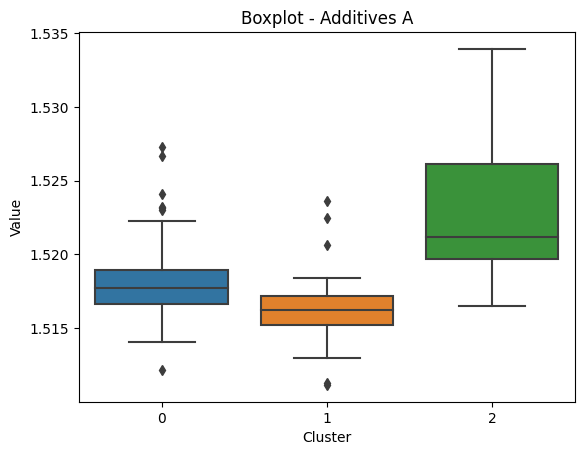

In [13]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='a')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives A')
plt.show()

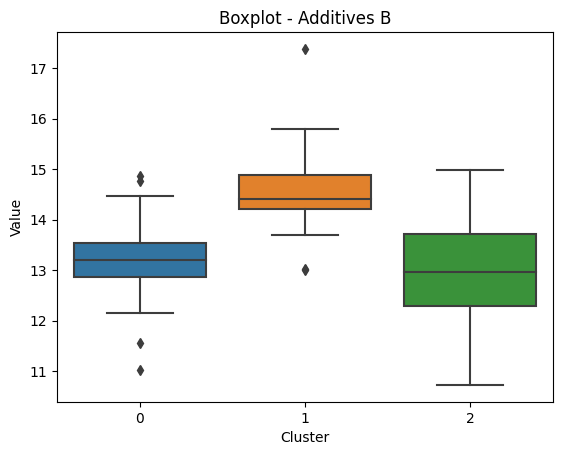

In [14]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='b')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives B')
plt.show()

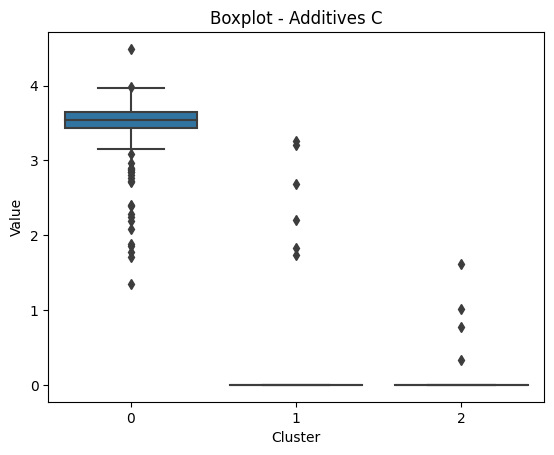

In [15]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='c')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives C')
plt.show()

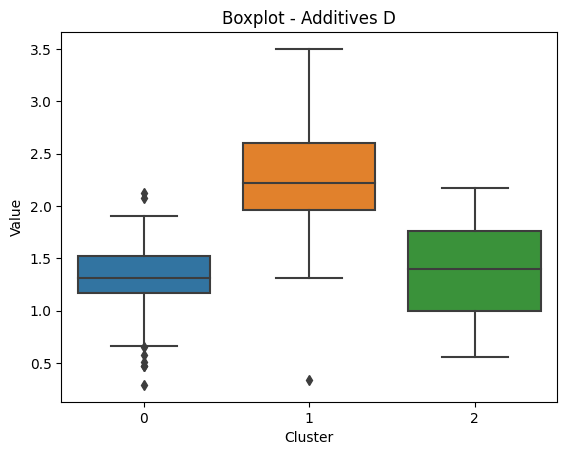

In [17]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='d')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives D')
plt.show()

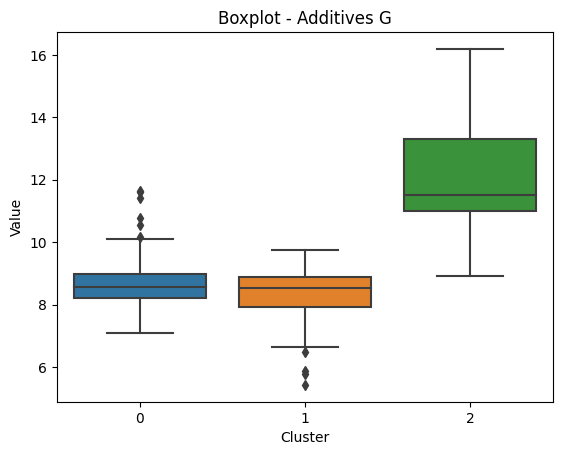

In [28]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='g')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives G')
plt.show()

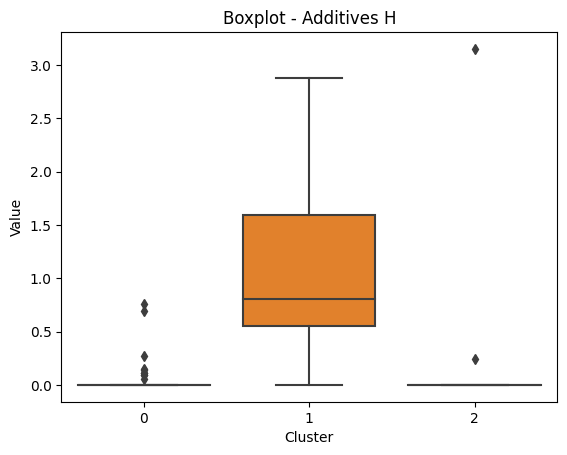

In [29]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='h')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives H')
plt.show()

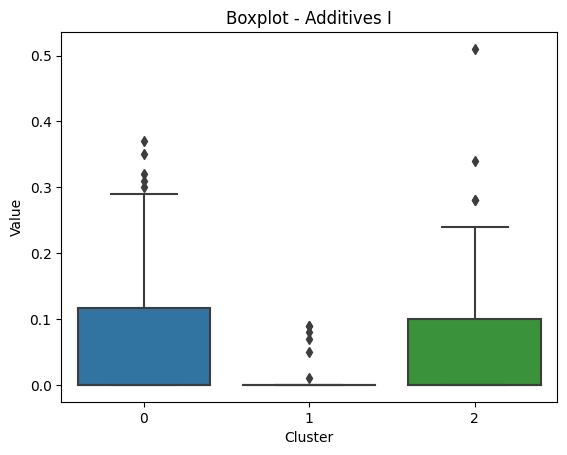

In [30]:
# Plotting
sns.boxplot(data=df_clustered, x='Cluster', y='i')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Boxplot - Additives I')
plt.show()

NameError: ignored